
<fieldset>
   <h3> <legend style="color: skyblue;">Machine Learning Project Of Diabetics Prediction</legend></h3>
</fieldset>


In [ ]:
# Numerical and Data Manipulation
import numpy as np  # Numerical computations and array manipulations
import pandas as pd  # Data manipulation and analysis using dataframes

# Data Visualization
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # General data visualization library

# Data Preprocessing
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance

# Model Selection and Evaluation
from sklearn.model_selection import (
    train_test_split,  # Split data into training and testing sets
    cross_val_score,   # Perform cross-validation
    GridSearchCV       # Hyperparameter tuning using grid search
)
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, log_loss
)

# Machine Learning Models
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report



<fieldset>
   <h3> <legend style="color: skyblue;">Loading and Preprocessing the Dataset</legend></h3>
</fieldset>


In [ ]:
# Load the dataset
diabetes_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# Print the columns to ensure we know their exact names and check for spaces
print("Columns in the dataset:", diabetes_dataset.columns)

# Remove any extra spaces from the column names to avoid issues with references
diabetes_dataset.columns = diabetes_dataset.columns.str.strip()

# Check for specific columns like 'smoking_status' and print a warning if it's missing or named differently
required_columns = ['smoking_status']  # List of required columns

# Loop through the required columns to check their presence
for col in required_columns:
    if col not in diabetes_dataset.columns:
        print(f"Warning: '{col}' column is missing or named differently.")
    else:
        print(f"'{col}' column is present.")  # Indicate presence of the column

# Print the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:")
print(diabetes_dataset.head())

Columns in the dataset: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



<fieldset>
   <h3> <legend style="color: skyblue;">Display dataset info and stats</legend></h3>
</fieldset>


In [ ]:
# Display dataset info and stats
print(diabetes_dataset.head())
print(diabetes_dataset.shape)
print(diabetes_dataset.describe())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
(100000, 9)
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
m

<fieldset>
   <h3> <legend style="color: skyblue;">Data Preprocessing: Count Diabetes and Encode Categorical Variables</legend></h3>
</fieldset>


In [ ]:
# Count diabetes values
print("Diabetes distribution:")
print(diabetes_dataset['diabetes'].value_counts())

# Separate features (X) and labels (Y)
X = diabetes_dataset.drop(columns='diabetes')  # Drop 'diabetes' column from features
Y = diabetes_dataset['diabetes']  # Store 'diabetes' column as labels

# Encode categorical variables

# Encode 'gender' column (0 for Female, 1 for Male)
X['gender'] = X['gender'].map({'Female': 0, 'Male': 1})

# Check if the 'smoking_status' column exists and encode it
if 'smoking_status' in X.columns:
    # Map 'smoking_status' values to numerical values
    X['smoking_status'] = X['smoking_status'].map({
        'never': 0,
        'former': 1,
        'current': 2,
        'not current': 3,
        'ever': 4,
        'No Info ': 5
    })
    print("'smoking_status' column encoded successfully.")
else:
    print("Note: 'smoking_status' column is missing, proceeding without it.")

# Print the first few rows of the modified data to confirm encoding
print("\nFirst few rows of the dataset after encoding:")
print(X.head())


Diabetes distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64
Note: 'smoking_status' column is missing, proceeding without it.

First few rows of the dataset after encoding:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0     0.0  80.0             0              1           never  25.19   
1     0.0  54.0             0              0         No Info  27.32   
2     1.0  28.0             0              0           never  27.32   
3     0.0  36.0             0              0         current  23.45   
4     1.0  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155  


<fieldset>
   <h3> <legend style="color: skyblue;">Handling Missing Values with Mean Imputation</legend></h3>
</fieldset>


In [ ]:
# List of numeric features to handle missing values
numeric_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Handle missing values (if any) by filling with the mean of each numeric column
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())


<fieldset>
   <h3> <legend style="color: skyblue;">Data Standarization</legend></h3>
</fieldset>


In [ ]:
# Select numeric columns for scaling
numeric_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Check if numeric columns exist in the dataset
missing_columns = [col for col in numeric_features if col not in X.columns]
if missing_columns:
    print(f"Warning: The following numeric columns are missing: {missing_columns}")
else:
    print("All numeric columns are present for scaling.")

# Extract the numeric features from the dataset
X_numeric = X[numeric_features]

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split the dataset into training and testing sets (80% for training and 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

# Print the shapes of the scaled data and splits to confirm correct dimensions
print("Scaled data shape:", X_scaled.shape)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


All numeric columns are present for scaling.
Scaled data shape: (100000, 6)
Training data shape: (80000, 6)
Test data shape: (20000, 6)


<fieldset>
   <h3> <legend style="color: skyblue;">Plot the correlation heatmap</legend></h3>
</fieldset>


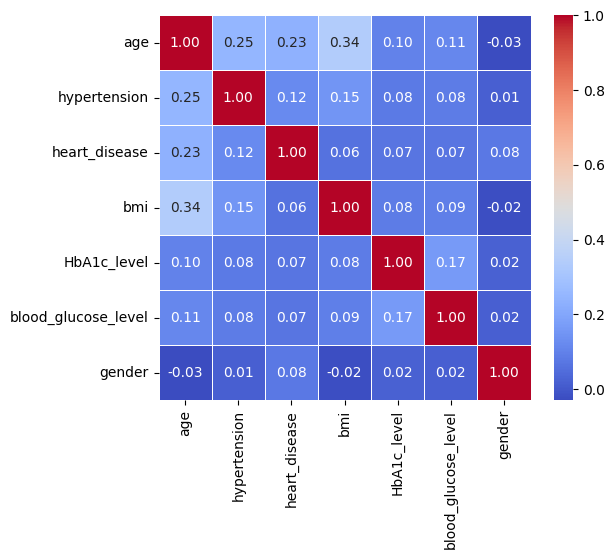

In [ ]:
# Assuming you want to analyze the last four numeric features:
# Assuming you want to analyze the last four numeric features:
#last_four_column = X[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level','smoking_status','gender']] #Original code with error
last_four_column = X[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender']] # Corrected code, removing the problematic column
# Compute the correlation matrix
correlation_matrix = last_four_column.select_dtypes(include=['number']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

<fieldset>
   <h3> <legend style="color: skyblue;">Training and hyperparameter tuning of models using GridSearchCV with cross-validation.</legend></h3>
</fieldset>


In [ ]:
# ---------------------------------
# 1. Support Vector Machine (SVM)
# ---------------------------------
print("\n" + "="*30)
print("🔹 SUPPORT VECTOR MACHINE (SVM) 🔹")
print("="*30)

# Hyperparameters for SVM:
# - 'C': Regularization parameter. Higher values reduce misclassification but risk overfitting.
# - 'kernel': Determines the decision boundary (linear, rbf, etc.)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV for hyperparameter tuning with 5-fold cross-validation
svm_classifier = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm_classifier.fit(X_train, Y_train)
svm_best = svm_classifier.best_estimator_
svm_cv_scores = cross_val_score(svm_best, X_train, Y_train, cv=5)
print('✅ Cross-Validation Accuracy Scores:', svm_cv_scores)
print('✅ Mean Cross-Validation Accuracy:', svm_cv_scores.mean())

# ---------------------------------
# 2. K-Nearest Neighbors (KNN)
# ---------------------------------
print("\n" + "="*30)
print("🔹 K-NEAREST NEIGHBORS (KNN) 🔹")
print("="*30)

# Hyperparameters for KNN:
# - 'n_neighbors': Number of neighbors considered for classification.
# - 'weights': Weight function used in prediction (uniform or distance).
knn_params = {
    'n_neighbors': range(5, 30, 5),
    'weights': ['uniform', 'distance']
}

# GridSearchCV for hyperparameter tuning
knn_classifier = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_classifier.fit(X_train, Y_train)
knn_best = knn_classifier.best_estimator_
knn_cv_scores = cross_val_score(knn_best, X_train, Y_train, cv=5)
print('✅ Cross-Validation Accuracy Scores:', knn_cv_scores)
print('✅ Mean Cross-Validation Accuracy:', knn_cv_scores.mean())

# ---------------------------------
# 3. Logistic Regression
# ---------------------------------
print("\n" + "="*30)
print("🔹 LOGISTIC REGRESSION 🔹")
print("="*30)

# Hyperparameters for Logistic Regression:
# - 'penalty': Type of regularization (l2).
# - 'C': Inverse of regularization strength.
# - 'solver': Algorithm for optimization.
logistic_params = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

# GridSearchCV for hyperparameter tuning
logistic_classifier = GridSearchCV(LogisticRegression(), logistic_params, cv=5)
logistic_classifier.fit(X_train, Y_train)
logistic_best = logistic_classifier.best_estimator_
logistic_cv_scores = cross_val_score(logistic_best, X_train, Y_train, cv=5)
print('✅ Cross-Validation Accuracy Scores:', logistic_cv_scores)
print('✅ Mean Cross-Validation Accuracy:', logistic_cv_scores.mean())

# ---------------------------------
# 4. Artificial Neural Network (ANN) with Early Stopping
# ---------------------------------
print("\n" + "="*30)
print("🔹 ARTIFICIAL NEURAL NETWORK (ANN) 🔹")
print("="*30)

# Hyperparameters for ANN:
# - 'hidden_layer_sizes': Defines the number of layers and neurons.
# - 'activation': Activation function for hidden layers.
# - 'alpha': Regularization strength.
# - 'max_iter': Maximum number of iterations.
# - 'early_stopping': Stops training if validation performance stops improving.
ann_params = {
    'hidden_layer_sizes': [(64, 32)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500],
    'early_stopping': [True]
}

# GridSearchCV for hyperparameter tuning
ann_classifier = GridSearchCV(MLPClassifier(random_state=42), ann_params, cv=5)
ann_classifier.fit(X_train, Y_train)
ann_best = ann_classifier.best_estimator_
ann_cv_scores = cross_val_score(ann_best, X_train, Y_train, cv=5)
print('✅ Cross-Validation Accuracy Scores:', ann_cv_scores)
print('✅ Mean Cross-Validation Accuracy:', ann_cv_scores.mean())

# ---------------------------------
# 5. Random Forest Classifier with Pruning
# ---------------------------------
print("\n" + "="*30)
print("🔹 RANDOM FOREST CLASSIFIER (PRUNING) 🔹")
print("="*30)

# Hyperparameters for Random Forest:
# - 'n_estimators': Number of trees in the forest.
# - 'max_depth': Limits tree depth.
# - 'min_samples_split': Minimum samples required to split a node.
# - 'ccp_alpha': Cost Complexity Pruning parameter.
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'ccp_alpha': [0.0, 0.01]
}

# GridSearchCV for hyperparameter tuning
rf_classifier = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_classifier.fit(X_train, Y_train)
rf_best = rf_classifier.best_estimator_
rf_cv_scores = cross_val_score(rf_best, X_train, Y_train, cv=5)
print('✅ Cross-Validation Accuracy Scores:', rf_cv_scores)
print('✅ Mean Cross-Validation Accuracy:', rf_cv_scores.mean())


🔹 SUPPORT VECTOR MACHINE (SVM) 🔹
✅ Cross-Validation Accuracy Scores: [0.969375  0.969375  0.967125  0.966125  0.9678125]
✅ Mean Cross-Validation Accuracy: 0.9679625

🔹 K-NEAREST NEIGHBORS (KNN) 🔹
✅ Cross-Validation Accuracy Scores: [0.9675    0.965875  0.9655    0.9641875 0.965    ]
✅ Mean Cross-Validation Accuracy: 0.9656125000000001

🔹 LOGISTIC REGRESSION 🔹
✅ Cross-Validation Accuracy Scores: [0.9605625 0.96075   0.9599375 0.9585    0.9608125]
✅ Mean Cross-Validation Accuracy: 0.9601124999999999

🔹 ARTIFICIAL NEURAL NETWORK (ANN) 🔹
✅ Cross-Validation Accuracy Scores: [0.972125  0.97225   0.9710625 0.9700625 0.9721875]
✅ Mean Cross-Validation Accuracy: 0.9715374999999999

🔹 RANDOM FOREST CLASSIFIER (PRUNING) 🔹
✅ Cross-Validation Accuracy Scores: [0.9729375 0.9723125 0.970875  0.9703125 0.9716875]
✅ Mean Cross-Validation Accuracy: 0.9716250000000001


<fieldset>
   <h3> <legend style="color: skyblue;">Evaluating model performance on training and test datasets.</legend></h3>
</fieldset>


In [ ]:
# ---------------------------------
# 1. Support Vector Machine (SVM) - Training and Testing Accuracy
# ---------------------------------
print("\n" + "="*30)
print("🔹 SVM TRAINING AND TESTING ACCURACY 🔹")
print("="*30)

# Evaluate training and testing accuracy
svm_train_accuracy = accuracy_score(Y_train, svm_best.predict(X_train))
svm_test_accuracy = accuracy_score(Y_test, svm_best.predict(X_test))
print('✅ Training Accuracy:', svm_train_accuracy)
print('✅ Test Accuracy:', svm_test_accuracy)

# ---------------------------------
# 2. K-Nearest Neighbors (KNN) - Training and Testing Accuracy
# ---------------------------------
print("\n" + "="*30)
print("🔹 KNN TRAINING AND TESTING ACCURACY 🔹")
print("="*30)

# Evaluate training and testing accuracy
knn_train_accuracy = accuracy_score(Y_train, knn_best.predict(X_train))
knn_test_accuracy = accuracy_score(Y_test, knn_best.predict(X_test))
print('✅ Training Accuracy:', knn_train_accuracy)
print('✅ Test Accuracy:', knn_test_accuracy)

# ---------------------------------
# 3. Logistic Regression - Training and Testing Accuracy
# ---------------------------------
print("\n" + "="*30)
print("🔹 LOGISTIC REGRESSION TRAINING AND TESTING ACCURACY 🔹")
print("="*30)

# Evaluate training and testing accuracy
logistic_train_accuracy = accuracy_score(Y_train, logistic_best.predict(X_train))
logistic_test_accuracy = accuracy_score(Y_test, logistic_best.predict(X_test))
print('✅ Training Accuracy:', logistic_train_accuracy)
print('✅ Test Accuracy:', logistic_test_accuracy)

# ---------------------------------
# 4. Artificial Neural Network (ANN) - Training and Testing Accuracy
# ---------------------------------
print("\n" + "="*30)
print("🔹 ANN TRAINING AND TESTING ACCURACY 🔹")
print("="*30)

# Evaluate training and testing accuracy
ann_train_accuracy = accuracy_score(Y_train, ann_best.predict(X_train))
ann_test_accuracy = accuracy_score(Y_test, ann_best.predict(X_test))
print('✅ Training Accuracy:', ann_train_accuracy)
print('✅ Test Accuracy:', ann_test_accuracy)

# -----------------------------------------------
# 5.Evaluate Training and Testing Accuracy for Random Forest
# -----------------------------------------------

# Initialize Random Forest with regularization parameters
rf_classifier = RandomForestClassifier(
    max_depth=10,  # Limit the maximum depth of trees
    min_samples_split=5,  # Minimum samples required to split a node
    min_samples_leaf=4,  # Minimum samples required to be at a leaf node
    n_estimators=100,  # Number of trees
    random_state=42
)

# Train the classifier
rf_classifier.fit(X_train, Y_train)

# Evaluate model
rf_train_accuracy = accuracy_score(Y_train, rf_classifier.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_classifier.predict(X_test))

print('Random Forest Training Accuracy:', rf_train_accuracy)
print('Random Forest Test Accuracy:', rf_test_accuracy)





🔹 SVM TRAINING AND TESTING ACCURACY 🔹
✅ Training Accuracy: 0.9686125
✅ Test Accuracy: 0.9708

🔹 KNN TRAINING AND TESTING ACCURACY 🔹
✅ Training Accuracy: 0.9675875
✅ Test Accuracy: 0.9676

🔹 LOGISTIC REGRESSION TRAINING AND TESTING ACCURACY 🔹
✅ Training Accuracy: 0.9601
✅ Test Accuracy: 0.9609

🔹 ANN TRAINING AND TESTING ACCURACY 🔹
✅ Training Accuracy: 0.9719625
✅ Test Accuracy: 0.97355
Random Forest Training Accuracy: 0.97215
Random Forest Test Accuracy: 0.9733


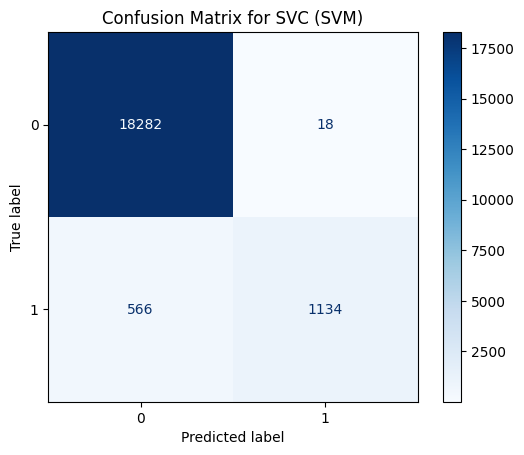

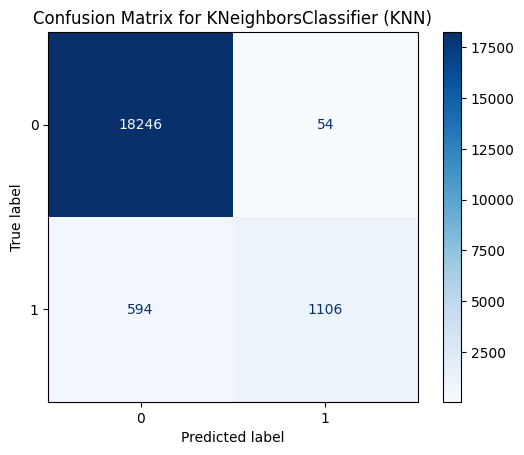

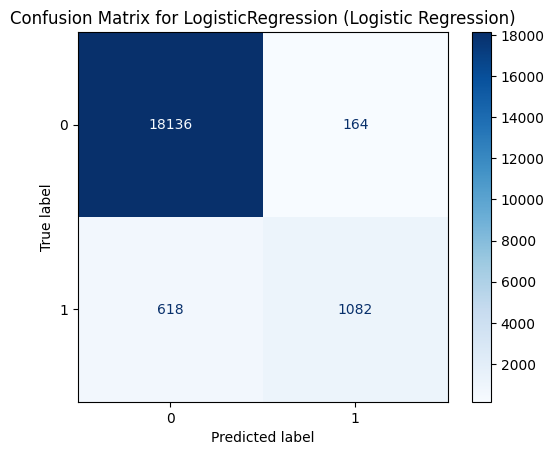

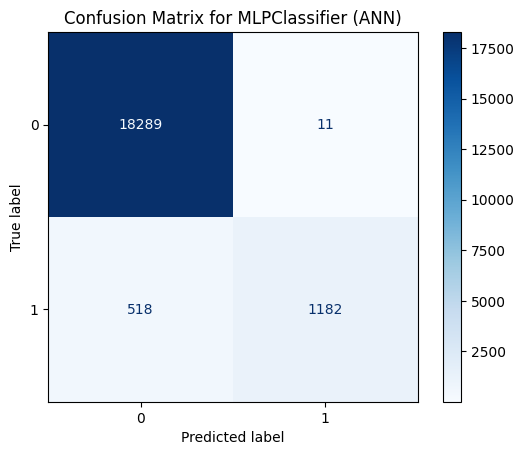

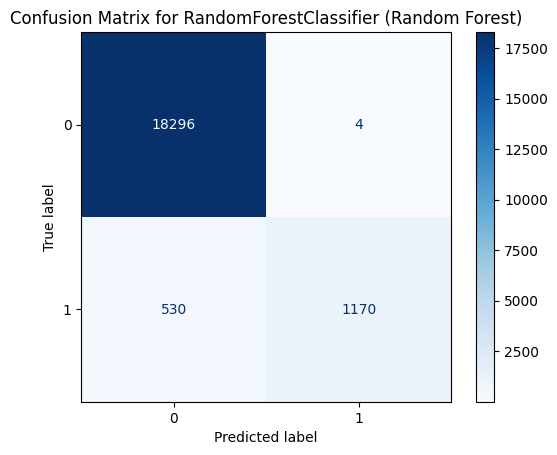

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def plot_confusion_matrix_for_model(model, X_test, Y_test, labels, title_suffix=""):
    """
    Generate and display a confusion matrix for a given model.

    Parameters:
    model: Trained model (e.g., SVM, KNN, etc.)
    X_test: Test features
    Y_test: True labels for test data
    labels: List of class labels
    title_suffix: Optional suffix to include in the plot title
    """
    # Predict the labels for the test set
    Y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {model.__class__.__name__} {title_suffix}")
    plt.show()

# Example: Assuming X_test, Y_test, and trained models (e.g., svm_best, knn_best, logistic_best, ann_best) are available.

labels = sorted(Y_test.unique())  # Ensure labels are sorted and consistent

# SVM Confusion Matrix
plot_confusion_matrix_for_model(svm_best, X_test, Y_test, labels, title_suffix="(SVM)")

# KNN Confusion Matrix
plot_confusion_matrix_for_model(knn_best, X_test, Y_test, labels, title_suffix="(KNN)")

# Logistic Regression Confusion Matrix
plot_confusion_matrix_for_model(logistic_best, X_test, Y_test, labels, title_suffix="(Logistic Regression)")

# ANN Confusion Matrix
plot_confusion_matrix_for_model(ann_best, X_test, Y_test, labels, title_suffix="(ANN)")

# Random Forest Confusion Matrix
plot_confusion_matrix_for_model(rf_classifier, X_test, Y_test, labels, title_suffix="(Random Forest)")


<fieldset>
   <h3> <legend style="color: skyblue;">Model Evaluation</legend></h3>
</fieldset>


In [ ]:
# ---------------------------
# Model Evaluation Function
# ---------------------------

def evaluate_model(model, X_test, Y_test):
    """
    Evaluates a given classification model using test data and prints key metrics.

    Parameters:
    - model: Trained classification model
    - X_test: Feature set from the test data
    - Y_test: True labels from the test data

    Outputs:
    - Confusion Matrix
    - Classification Report
    - Accuracy Score
    - Precision Score (Weighted)
    - Recall Score (Weighted)
    - F1 Score (Weighted)
    """
    # Generate predictions using the test dataset
    predictions = model.predict(X_test)

    # Print confusion matrix to analyze correct and incorrect predictions
    print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))

    # Print classification report for a detailed breakdown of precision, recall, and F1 score
    print("\nClassification Report:\n", classification_report(Y_test, predictions))

    # Print overall evaluation metrics
    print("Accuracy Score:", accuracy_score(Y_test, predictions))
    print("Precision Score (Weighted):", precision_score(Y_test, predictions, average='weighted'))
    print("Recall Score (Weighted):", recall_score(Y_test, predictions, average='weighted'))
    print("F1 Score (Weighted):", f1_score(Y_test, predictions, average='weighted'))


# ---------------------------
# Evaluate Each Model
# ---------------------------

# Evaluate the Support Vector Machine (SVM) model
print("\n--- SVM Evaluation ---")
evaluate_model(svm_best, X_test, Y_test)

# Evaluate the K-Nearest Neighbors (KNN) model
print("\n--- KNN Evaluation ---")
evaluate_model(knn_best, X_test, Y_test)

# Evaluate the Logistic Regression model
print("\n--- Logistic Regression Evaluation ---")
evaluate_model(logistic_best, X_test, Y_test)

# Evaluate the Artificial Neural Network (ANN) model
print("\n--- ANN Evaluation ---")
evaluate_model(ann_classifier, X_test, Y_test)



--- SVM Evaluation ---
Confusion Matrix:
 [[18282    18]
 [  566  1134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.98      0.67      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Accuracy Score: 0.9708
Precision Score (Weighted): 0.9711946890916808
Recall Score (Weighted): 0.9708
F1 Score (Weighted): 0.9682100467392398

--- KNN Evaluation ---
Confusion Matrix:
 [[18246    54]
 [  594  1106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.65      0.77      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.82      0.88     20000
weighted avg       0.97      0.97      0.96     20000

Accura

<fieldset>
   <h3> <legend style="color: skyblue;">Performance Evaluation of Machine Learning Models: Accuracy and Loss Analysis</legend></h3>
</fieldset>


In [ ]:
# -----------------------------------------------------
# Log Loss Calculation for Different Machine Learning Models
# -----------------------------------------------------

# --------------------------------------
# 1. Support Vector Machine (SVM)
# --------------------------------------
# Initialize SVM with probability estimates enabled
# 'probability=True' ensures that SVM can output class probabilities (required for log loss calculation)
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, Y_train)  # Train the SVM classifier on the training data

# Calculate log loss using predicted probabilities
svm_train_loss = log_loss(Y_train, svm_classifier.predict_proba(X_train))
svm_test_loss = log_loss(Y_test, svm_classifier.predict_proba(X_test))

# Print training and test log loss for SVM
print('SVM Training Loss:', svm_train_loss)
print('SVM Test Loss:', svm_test_loss)


# --------------------------------------
# 2. K-Nearest Neighbors (KNN)
# --------------------------------------
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)  # Train the KNN classifier on the training data

# Calculate log loss using predicted probabilities
knn_train_loss = log_loss(Y_train, knn_classifier.predict_proba(X_train))
knn_test_loss = log_loss(Y_test, knn_classifier.predict_proba(X_test))

# Print training and test log loss for KNN
print('KNN Training Loss:', knn_train_loss)
print('KNN Test Loss:', knn_test_loss)


# --------------------------------------
# 3. Logistic Regression
# --------------------------------------
# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train, Y_train)  # Train the Logistic Regression classifier

# Calculate log loss using predicted probabilities
logistic_train_loss = log_loss(Y_train, logistic_classifier.predict_proba(X_train))
logistic_test_loss = log_loss(Y_test, logistic_classifier.predict_proba(X_test))

# Print training and test log loss for Logistic Regression
print('Logistic Regression Training Loss:', logistic_train_loss)
print('Logistic Regression Test Loss:', logistic_test_loss)


# --------------------------------------
# 4. Artificial Neural Network (ANN)
# --------------------------------------
# Initialize ANN classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
ann_classifier.fit(X_train, Y_train)  # Train the ANN classifier on the training data

# Calculate log loss using predicted probabilities
ann_train_loss = log_loss(Y_train, ann_classifier.predict_proba(X_train))
ann_test_loss = log_loss(Y_test, ann_classifier.predict_proba(X_test))

# Print training and test log loss for ANN
print('ANN Training Loss:', ann_train_loss)
print('ANN Test Loss:', ann_test_loss)


# --------------------------------------
# 5. Random Forest Classifier
# --------------------------------------
# Initialize Random Forest classifier
# n_estimators=100 sets the number of trees in the forest
# random_state ensures reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)  # Train the Random Forest classifier

# Calculate log loss using predicted probabilities
rf_train_loss = log_loss(Y_train, rf_classifier.predict_proba(X_train))
rf_test_loss = log_loss(Y_test, rf_classifier.predict_proba(X_test))

# Print training and test log loss for Random Forest
print('Random Forest Training Loss:', rf_train_loss)
print('Random Forest Test Loss:', rf_test_loss)


SVM Training Loss: 0.11521398703479138
SVM Test Loss: 0.11191272225685411
KNN Training Loss: 0.06481401582040192
KNN Test Loss: 0.4999149961318686
Logistic Regression Training Loss: 0.11449135652777229
Logistic Regression Test Loss: 0.11448570585950957
ANN Training Loss: 0.08215064951899638
ANN Test Loss: 0.07925437117485938
Random Forest Training Loss: 0.02265033008390772
Random Forest Test Loss: 0.19315662829040633


<fieldset>
   <h3> <legend style="color: skyblue;">Comparison of Model Training and Test Accuracies Using Different Algorithms</legend></h3>
</fieldset>


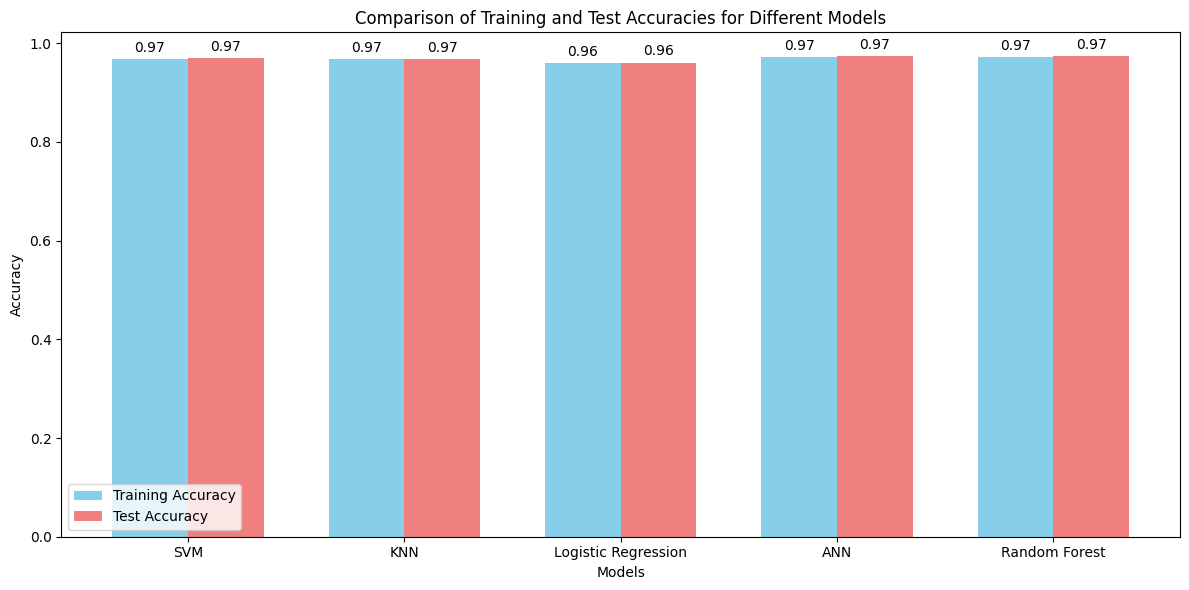

In [ ]:
# -----------------------------------------------
# Accuracy Comparison Plot for Different Models
# -----------------------------------------------

# Define model names and their respective accuracy scores
# 'models' holds the names of the machine learning models
# 'train_accuracies' and 'test_accuracies' store the accuracy values for each model
models = ['SVM', 'KNN', 'Logistic Regression', 'ANN', 'Random Forest']
train_accuracies = [svm_train_accuracy, knn_train_accuracy, logistic_train_accuracy, ann_train_accuracy, rf_train_accuracy]
test_accuracies = [svm_test_accuracy, knn_test_accuracy, logistic_test_accuracy, ann_test_accuracy, rf_test_accuracy]

# Set the position of bars on the X-axis
# 'x' represents the position of each model on the X-axis
# 'width' defines the width of the bars
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Create a bar plot to compare training and test accuracies
fig, ax = plt.subplots(figsize=(12, 6))

# Plot training accuracies as sky-blue bars
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')

# Plot test accuracies as light-coral bars
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='lightcoral')

# Add labels and title to the plot
ax.set_xlabel('Models')  # X-axis label
ax.set_ylabel('Accuracy')  # Y-axis label
ax.set_title('Comparison of Training and Test Accuracies for Different Models')  # Title

# Customize X-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add a legend to differentiate between training and test accuracies
ax.legend()

# Define a function to annotate bars with their respective accuracy values
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height (accuracy value).
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Display accuracy with 2 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),  # Position at bar top
                    xytext=(0, 3),  # Slightly offset text upwards
                    textcoords='offset points',
                    ha='center', va='bottom')  # Center-align text horizontally

# Add accuracy annotations to both training and test bars
autolabel(rects1)
autolabel(rects2)

# Adjust plot layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()

<fieldset>
   <h3> <legend style="color: skyblue;">Sample Input Data Prediction</legend></h3>
</fieldset>


In [ ]:
# Example numeric features list (replace with your actual numeric features)
numeric_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Take user input
gender = input("Enter gender (Female/Male): ")
age = float(input("Enter age: "))
hypertension = int(input("Hypertension (0: No, 1: Yes): "))
heart_disease = int(input("Heart Disease (0: No, 1: Yes): "))
smoking_history = input("Smoking Status (never/former/current/not current/ever/No Info): ")
bmi = float(input("Enter BMI: "))
HbA1c_level = float(input("Enter HbA1c level: "))
blood_glucose_level = float(input("Enter blood glucose level: "))

# Create a DataFrame
input_data = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'smoking_history': [smoking_history],
    'bmi': [bmi],
    'HbA1c_level': [HbA1c_level],
    'blood_glucose_level': [blood_glucose_level]
}

input_df = pd.DataFrame(input_data)

# Map categorical variables
input_df['gender'] = input_df['gender'].map({'Female': 0, 'Male': 1})
input_df['smoking_history'] = input_df['smoking_history'].map({
    'never': 0,
    'former': 1,
    'current': 2,
    'not current': 3,
    'ever': 4,
    'No Info': 5
})

# Ensure no missing values
input_df.fillna(input_df.mean(numeric_only=True), inplace=True)

# Standardize input data (ensure scaler is already fitted on training data)
try:
    std_data = scaler.transform(input_df[numeric_features])
except NameError:
    print("Scaler is not defined. Ensure 'scaler' is fitted on training data.")
    raise

# Make predictions with all models
print("\nPredictions for User Input Data:")
print("----------------------------------\n")
models = {
    'SVM                    ': svm_classifier,
    'KNN                    ': knn_classifier,
    'Logistic Regression    ': logistic_classifier,
    'ANN                    ': ann_classifier
}

for model_name, model in models.items():
    try:
        prediction = model.predict(std_data)
        result = 'Diabetic' if prediction[0] == 1 else 'Not Diabetic'
        print(f'{model_name}: {result}')
    except NameError:
        print(f"{model_name} is not defined. Ensure the model is trained and available.")
print("----------------------------------\n")
